In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [3]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, ), (0.5, )),
                               ])

#Download and load the training data

trainset = datasets.MNIST('~/.pytorch/MNIST_data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle=True)

In [4]:
trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\vivekanand.joshi/.pytorch/MNIST_data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [5]:
dataiter = iter(trainloader)

images, labels = dataiter.next()

#Images is the X vector which we have to transform.

In [6]:
images.shape

torch.Size([64, 1, 28, 28])

In [7]:
labels.shape

torch.Size([64])

### Image is tensor X and label is digit value for corresponding images for tensor X

In [8]:
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


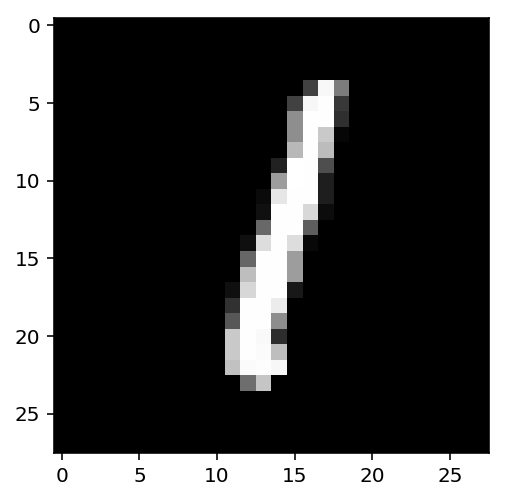

In [9]:
plt.imshow(images[63].numpy().squeeze(), cmap = 'Greys_r')

In [10]:
def activation(x):
    return 1/(1+torch.exp(-x))

In [11]:
#view rehapes the tensor. here we are reshaping it to 64 * 784 which is 28*28. -1 reshapes into form that 
                                    #number of rows are provided and rest of them are reshaped accordingly.

inputs = images.view(images.shape[0], -1)

In [12]:
inputs.shape

torch.Size([64, 784])

## 784 input units, 256 hidden layer, 10 output layers

In [13]:
#Create Parameters

w1 = torch.randn(784, 256)
b1 = torch.randn(256)


w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1)+b1)

out = torch.mm(h,w2) + b2

In [14]:
print(inputs.shape)
print(w1.shape)
print(b1.shape)
print(w2.shape)
print(b2.shape)
print(h.shape)
print(out.shape)

torch.Size([64, 784])
torch.Size([784, 256])
torch.Size([256])
torch.Size([256, 10])
torch.Size([10])
torch.Size([64, 256])
torch.Size([64, 10])


## Implement Softmax function 

$$
\Large \sigma(x_i) = \cfrac{e^{x_i}}{\sum_k^K{e^{x_k}}}
$$

In [15]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim = 1).view(-1, 1)

In [16]:
probabilities = softmax(out)

In [17]:
print(probabilities.shape)
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


## Building networks with Pytorch

In [18]:
from torch import nn

In [19]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        #Inputs to hidden layer transformation
        self.hidden = nn.Linear(784, 256)
        
        #Output layers, 10 units  - one for each digit
        
        self.output = nn.Linear(256, 10)
        
        #Define sigmoid function 
        
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim = 1)
        
    def forward(self, x):
        #Pass the input tensor through each of the operations
        
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [20]:
#Create a network and look at it's text representation

model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

## We can define the network using torch.nn.functional module as well

In [21]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        #Inputs to hidden layer transformation
        self.hidden = nn.Linear(784, 256)
        #Output Layer 10 outputs - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        #Hidden Layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        #Output Layer with softmax activation 
        x = F.softmax(self.output(x), dim = 1)
        
        return x
        

> **Exercise:** Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activation as shown above. You can use a ReLU activation with the `nn.ReLU` module or `F.relu` function.

In [22]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        #Inputs to first hidden layer transformation (784 --> 128)
        self.fc1 = nn.Linear(784, 128)
        #Inputs to second hidden layer trnasformation (128 --> 64)
        self.fc2 = nn.Linear(128, 64)
        #Output Layer - 10 outputs
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward Pass through the network, return the logit outputs'''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim = 1)
        
        return x
    
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [23]:
print(model.fc1.weight)

Parameter containing:
tensor([[-0.0112,  0.0192,  0.0254,  ..., -0.0257,  0.0011,  0.0114],
        [ 0.0204,  0.0173, -0.0013,  ...,  0.0004, -0.0104,  0.0163],
        [-0.0129, -0.0183,  0.0318,  ..., -0.0081, -0.0086,  0.0244],
        ...,
        [ 0.0030, -0.0124,  0.0320,  ...,  0.0325,  0.0109, -0.0213],
        [-0.0022,  0.0107,  0.0193,  ..., -0.0052,  0.0138,  0.0102],
        [-0.0097, -0.0317, -0.0111,  ..., -0.0025, -0.0334,  0.0293]],
       requires_grad=True)


In [24]:
print(model.fc1.bias)

Parameter containing:
tensor([ 0.0271, -0.0198, -0.0354,  0.0277, -0.0166,  0.0140, -0.0272,  0.0331,
        -0.0085, -0.0195,  0.0053, -0.0239, -0.0190,  0.0153, -0.0275, -0.0257,
         0.0160, -0.0004,  0.0225, -0.0208, -0.0336, -0.0197, -0.0278,  0.0023,
         0.0178, -0.0332, -0.0019,  0.0155, -0.0133,  0.0054,  0.0272,  0.0219,
         0.0165, -0.0049,  0.0154, -0.0017,  0.0219,  0.0228, -0.0227, -0.0111,
        -0.0111, -0.0199,  0.0199,  0.0025,  0.0096,  0.0322,  0.0005,  0.0186,
        -0.0135, -0.0340,  0.0039,  0.0108, -0.0179, -0.0119,  0.0160, -0.0265,
         0.0243,  0.0029,  0.0342,  0.0076,  0.0227, -0.0167, -0.0266, -0.0178,
         0.0198,  0.0167,  0.0076,  0.0198,  0.0014,  0.0140,  0.0065, -0.0241,
         0.0020,  0.0171, -0.0206,  0.0036,  0.0247,  0.0117, -0.0235, -0.0091,
         0.0158,  0.0324,  0.0346,  0.0187,  0.0086, -0.0128,  0.0127,  0.0252,
         0.0109,  0.0322,  0.0091,  0.0084, -0.0119,  0.0212, -0.0238,  0.0001,
        -0.0302, -

### Bias and weights can be manually initialized as well

In [25]:
#Set biases to all Zeroes

model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
#Sample from random normal with standerd dev = 0.01

model.fc1.weight.data.normal_(std=0.01)

tensor([[-6.3244e-03,  1.5941e-03,  1.5162e-02,  ..., -7.3377e-03,
         -7.6219e-03,  1.1322e-02],
        [-2.7033e-03, -1.3520e-02,  5.4936e-03,  ..., -4.7003e-03,
         -1.9595e-03,  4.4981e-03],
        [ 4.0346e-03,  1.0903e-03, -1.4985e-02,  ...,  6.8811e-03,
         -2.1096e-03,  1.2347e-02],
        ...,
        [-6.9257e-03, -5.7803e-03, -3.9972e-03,  ..., -2.7607e-03,
          3.7456e-03,  4.6671e-03],
        [ 5.3791e-03,  2.1037e-03, -5.1850e-03,  ..., -3.5087e-04,
          8.8275e-03, -1.0747e-02],
        [-6.8513e-04, -1.5196e-03, -9.2165e-03,  ..., -2.9668e-05,
         -6.8529e-03, -2.9068e-03]])

## Forward Pass

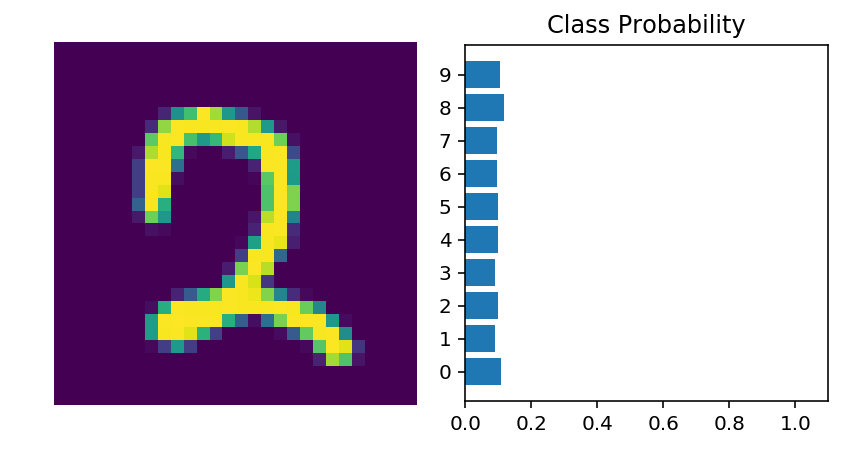

In [27]:
#Now that we have a network , we will pass the images

#There was error in helper , so i downloaded helper.py from github and put it into same folder as notebook. 
#The error was on view_calssify method

from helper import *


#Grab some data
dataiter = iter(trainloader)
images, labels = dataiter.next()

#Resize images into a 1D vector , new shape is (batch size, color channels, image pixels)
images.resize_(64, 1, 784)

# Forward pass through the network 
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1,28,28),ps)

Our classifier has no idea what digit it is. It gives same probability for all the classes.

## Using nn.sequential()

In [30]:
#Hyperparamters for our network

input_size = 784
hidden_sizes = [128,64]
output_size = 10

#Build a forward-feed network 

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim = 1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


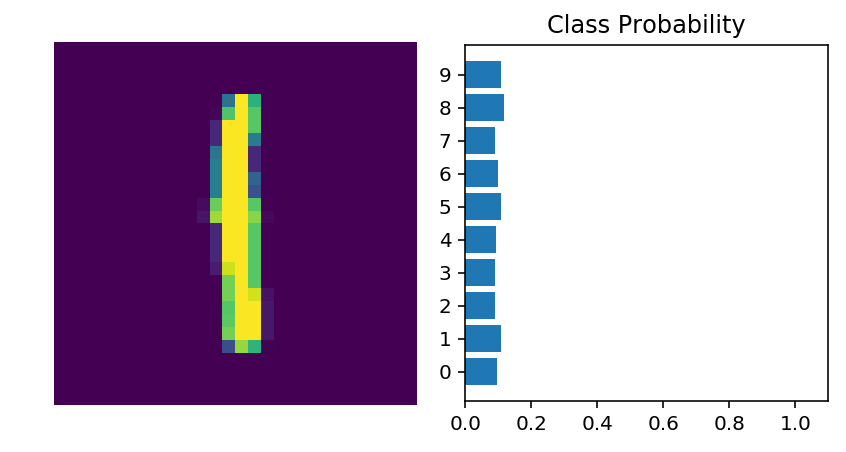

In [31]:
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

The operations are availble by passing in the appropriate index. For example, if you want to get first Linear operation and look at the weights, you'd use `model[0]`.

In [32]:
print(model[0])

Linear(in_features=784, out_features=128, bias=True)


In [33]:
print(model[1])

ReLU()


In [35]:
print(model[5])

Softmax(dim=1)


In [40]:
model[4].weight.shape

torch.Size([10, 64])

You can also pass in an `OrderedDict` to name the individual layers and operations, instead of using incremental integers. Note that dictionary keys must be unique, so _each operation must have a different name_.

In [45]:
from collections import OrderedDict

model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(input_size, hidden_sizes[0])),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
    ('relu2', nn.ReLU()),
    ('fc3', nn.Linear(hidden_sizes[1], output_size)),
    ('softmax', nn.Softmax(dim = 1))]))

model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [47]:
print(model[0])
print(model.softmax)

Linear(in_features=784, out_features=128, bias=True)
Softmax(dim=1)
